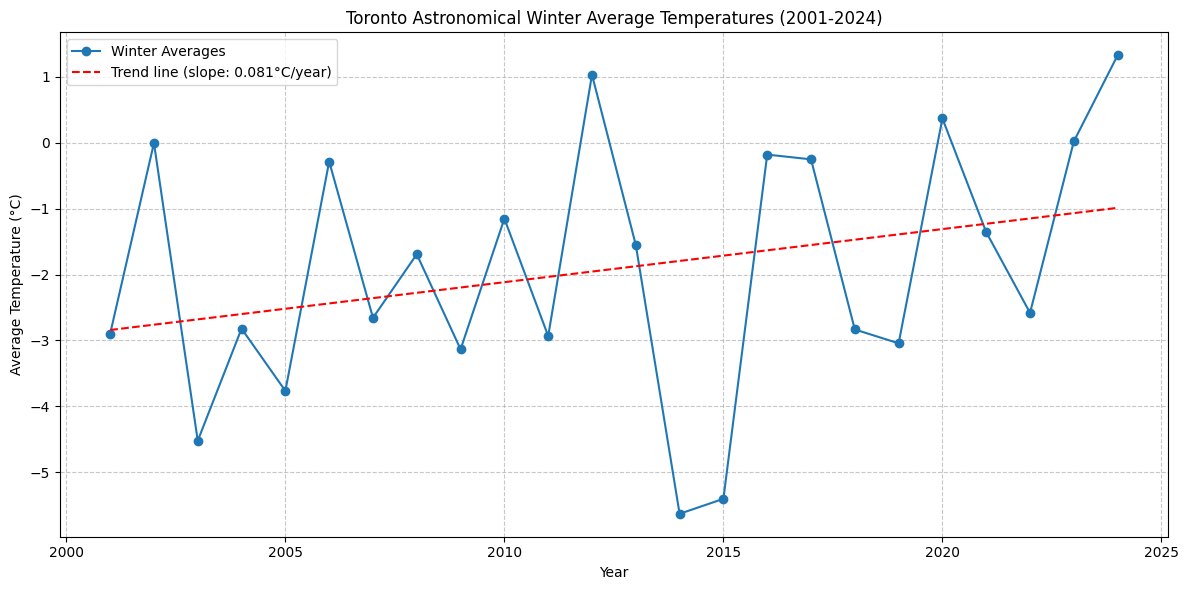

In [3]:
from datetime import datetime
import calendar
from meteostat import Point, Daily
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Create Point for Toronto, ON
location = Point(43.6532, -79.3832, 76)

# Dictionary of winter dates (year: (start_date, end_date))
winter_dates = {
    2001: ("2000-12-21 08:37", "2001-03-20 02:35"),
    2002: ("2001-12-21 14:21", "2002-03-20 08:31"),
    2003: ("2002-12-21 20:14", "2003-03-20 14:16"),
    2004: ("2003-12-22 02:04", "2004-03-20 20:00"),
    2005: ("2004-12-21 07:42", "2005-03-20 01:49"),
    2006: ("2005-12-21 13:35", "2006-03-20 07:34"),
    2007: ("2006-12-21 19:22", "2007-03-20 13:26"),
    2008: ("2007-12-22 01:08", "2008-03-20 19:07"),
    2009: ("2008-12-21 07:04", "2009-03-20 01:48"),
    2010: ("2009-12-21 12:47", "2010-03-20 07:44"),
    2011: ("2010-12-21 18:38", "2011-03-20 13:32"),
    2012: ("2011-12-22 00:30", "2012-03-20 19:21"),
    2013: ("2012-12-21 06:12", "2013-03-20 01:14"),
    2014: ("2013-12-21 12:11", "2014-03-20 07:02"),
    2015: ("2014-12-21 18:03", "2015-03-20 12:57"),
    2016: ("2015-12-22 00:48", "2016-03-20 18:45"),
    2017: ("2016-12-21 05:44", "2017-03-20 00:30"),
    2018: ("2017-12-21 11:28", "2018-03-20 06:28"),
    2019: ("2018-12-21 17:23", "2019-03-20 12:15"),
    2020: ("2019-12-21 23:19", "2020-03-20 18:58"),
    2021: ("2020-12-21 05:02", "2021-03-19 23:50"),
    2022: ("2021-12-21 10:59", "2022-03-20 05:37"),
    2023: ("2022-12-21 16:48", "2023-03-20 11:33"),
    2024: ("2023-12-21 22:27", "2024-03-20 17:24")
}

def get_winter_data(year):
    # Get the winter dates for this year
    start_str, end_str = winter_dates[year]
    start = datetime.strptime(start_str, "%Y-%m-%d %H:%M")
    end = datetime.strptime(end_str, "%Y-%m-%d %H:%M")

    data = Daily(location, start, end)
    return data.fetch()

# Create empty list to store all winter data
winter_data = []
winter_averages = {}

# Get data for winters from 2001 to 2024
for year in range(2001, 2025):
    data = get_winter_data(year)
    data['winter_year'] = year
    winter_data.append(data)
    winter_averages[year] = data['tavg'].mean()

# Create pandas Series for winter averages
winter_averages_series = pd.Series(winter_averages)
# print("\nWinter Averages:")
# print(winter_averages_series)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the winter averages
plt.plot(winter_averages_series.index, winter_averages_series.values, 'o-', label='Winter Averages')

# Calculate and plot trendline
x = winter_averages_series.index
y = winter_averages_series.values
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, 'r--', label=f'Trend line (slope: {slope:.3f}°C/year)')

# Customize the plot
plt.title('Toronto Astronomical Winter Average Temperatures (2001-2024)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()